In [27]:
%pip install geopy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%pip install geopy

# Load dataset (adjust the path as needed)
df = pd.read_csv('./uber.csv')

# 1. Dataset structure and dimensions
print("Dataset shape (rows, columns):", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# 2. Data types and variable descriptions
print("\nData types of each column:")
print(df.dtypes)

print("\nSummary statistics for numeric variables:")
print(df.describe())

print("\nSummary statistics for categorical/object variables:")
print(df.describe(include=['object']))

# 3. Initial data quality assessment
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Optionally: check unique values for categorical variables
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in column '{col}':")
    print(df[col].value_counts().head(10))  # show top 10 frequent values


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset shape (rows, columns): (200000, 9)

First 5 rows:
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         

In [28]:
# Check dataset shape
print("Shape:", df.shape)

# Display info
df.info()

# Show column names
print("Columns:", df.columns.tolist())


Shape: (200000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
Columns: ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [29]:
# Descriptive statistics
df.describe(include='all')

# Check missing values
df.isnull().sum()


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [31]:
# ---------------------------
# 4. Handle missing values and clean the data
# ---------------------------

# Drop rows with missing critical fields
df = df.dropna(subset=[
    'fare_amount', 
    'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude',
    'pickup_datetime'
])

# Convert pickup_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df = df.dropna(subset=['pickup_datetime'])  # drop if conversion failed

# Remove negative or zero fares
df = df[df['fare_amount'] > 0] 

# Remove rides with 0 or unusually high passenger count (if exists)
if 'passenger_count' in df.columns:
    df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

# Remove duplicates
df = df.drop_duplicates()

# ---------------------------
# 5. Save cleaned dataset as CSV
# ---------------------------
df.to_csv('./uber_cleaned.csv', index=False)
print("\n✅ Cleaned dataset exported to './data/uber_cleaned.csv'")

# ---------------------------
# 6. Final dataset overview
# ---------------------------
print("\nAfter cleaning:")
print("Shape:", df.shape)
print("Remaining missing values:")
print(df.isnull().sum())


✅ Cleaned dataset exported to './data/uber_cleaned.csv'

After cleaning:
Shape: (199268, 9)
Remaining missing values:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [43]:
%pip install matplotlib seaborn
%pip install seaborn as sns

# ---------------------------
# 8. Exploratory Data Analysis (EDA)
# ---------------------------

print("\n🔍 Exploratory Data Analysis")

# ----------------------------
# 1. Descriptive Statistics
# ----------------------------
print("\n📊 Descriptive Statistics:")
print("Mean fare: $", round(df['fare_amount'].mean(), 2))
print("Median fare: $", round(df['fare_amount'].median(), 2))
print("Mode fare: $", df['fare_amount'].mode()[0])
print("Standard deviation: $", round(df['fare_amount'].std(), 2))

print("\n📐 Quartiles:")
print(df['fare_amount'].quantile([0.25, 0.5, 0.75]))

print("\n🎯 Fare range:")
print("Min fare: $", df['fare_amount'].min())
print("Max fare: $", df['fare_amount'].max())

# ----------------------------
# 2. Outlier Detection (IQR)
# ----------------------------
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]
print("\n🚨 Number of outliers in fare_amount:", len(outliers))

# ----------------------------

# 4. Compute Distance (km)
# ----------------------------

# Remove rows with invalid lat/lon
df = df[
    (df['pickup_latitude'].between(-90, 90)) &
    (df['dropoff_latitude'].between(-90, 90)) &
    (df['pickup_longitude'].between(-180, 180)) &
    (df['dropoff_longitude'].between(-180, 180))
]

from geopy.distance import geodesic

def haversine_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).km

df['distance_km'] = df.apply(haversine_distance, axis=1)
df = df[df['distance_km'] > 0]  # remove zero-distance trips

# ----------------------------
# 5. Extract Hour from Datetime
# ----------------------------
df['hour'] = df['pickup_datetime'].dt.hour

# ----------------------------


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.

🔍 Exploratory Data Analysis

📊 Descriptive Statistics:
Mean fare: $ 11.36
Median fare: $ 8.5
Mode fare: $ 6.5
Standard deviation: $ 9.76

📐 Quartiles:
0.25     6.0
0.50     8.5
0.75    12.5
Name: fare_amount, dtype: float64

🎯 Fare range:
Min fare: $ 0.01
Max fare: $ 499.0

🚨 Number of outliers in fare_amount: 16619


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


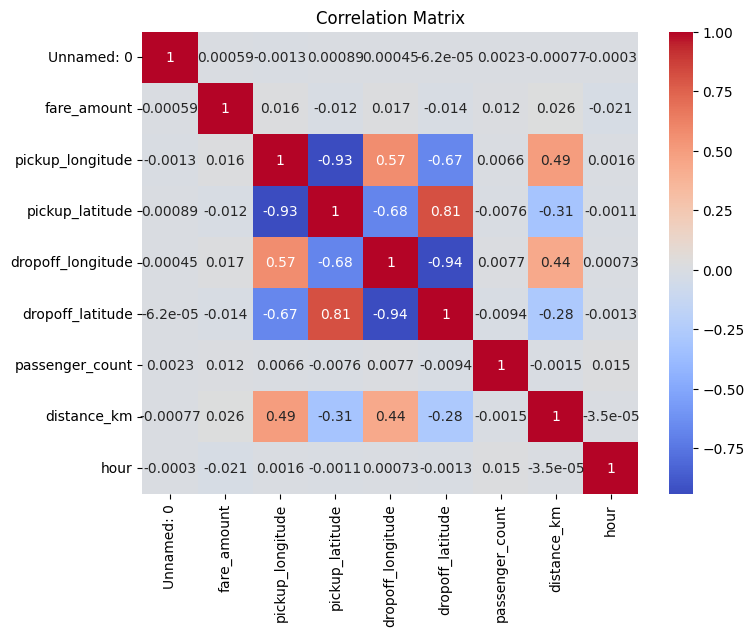

In [36]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


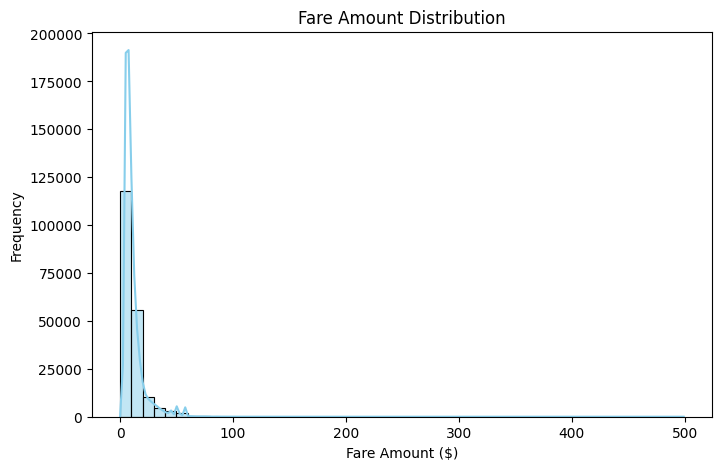

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()


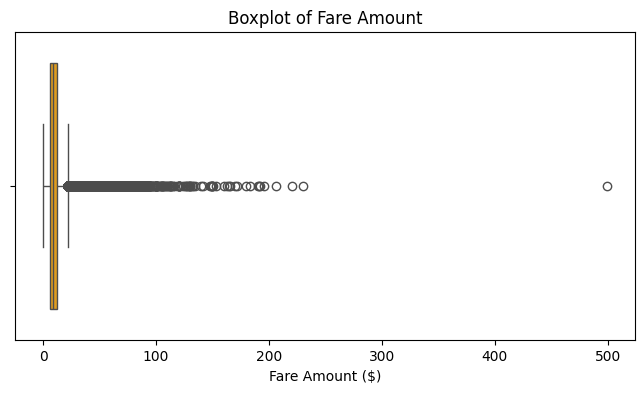

In [38]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare_amount'], color='orange')
plt.title('Boxplot of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.show()


In [41]:
# Central tendency and spread
print("➡️ Mean:\n", df .mean(numeric_only=True))
print("\n➡️ Median:\n", df .median(numeric_only=True))
print("\n➡️ Mode:\n", df .mode(numeric_only=True).iloc[0])
print("\n➡️ Standard Deviation:\n", df .std(numeric_only=True))

# Quartiles and IQR
Q1 = df .quantile(0.25, numeric_only=True)
Q3 = df .quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print("\n➡️ IQR (Interquartile Range):\n", IQR)


➡️ Mean:
 Unnamed: 0           2.770996e+07
fare_amount          1.136318e+01
pickup_longitude    -7.382725e+01
pickup_latitude      4.064721e+01
dropoff_longitude   -7.383778e+01
dropoff_latitude     4.065165e+01
passenger_count      1.689781e+00
distance_km          2.091298e+01
hour                 1.348940e+01
day                  1.570464e+01
month                6.282642e+00
dtype: float64

➡️ Median:
 Unnamed: 0           2.774117e+07
fare_amount          8.500000e+00
pickup_longitude    -7.398212e+01
pickup_latitude      4.075324e+01
dropoff_longitude   -7.398054e+01
dropoff_latitude     4.075370e+01
passenger_count      1.000000e+00
distance_km          2.185231e+00
hour                 1.400000e+01
day                  1.600000e+01
month                6.000000e+00
dtype: float64

➡️ Mode:
 Unnamed: 0            1.000000
fare_amount           6.500000
pickup_longitude      0.000000
pickup_latitude       0.000000
dropoff_longitude     0.000000
dropoff_latitude      0.000000
pa

In [ ]:
# Convert pickup_datetime to datetime
df ['pickup_datetime'] = pd.to_datetime(df ['pickup_datetime'])

# Preview to confirm
df [['pickup_datetime']].head()


,pickup_datetime
0,2015-05-07 19:52:06+00:00
1,2009-07-17 20:04:56+00:00
2,2009-08-24 21:45:00+00:00
3,2009-06-26 08:22:21+00:00
4,2014-08-28 17:47:00+00:00


In [40]:
# Extract time-related features
df ['hour'] = df ['pickup_datetime'].dt.hour
df ['day'] = df ['pickup_datetime'].dt.day
df ['weekday'] = df ['pickup_datetime'].dt.day_name()
df ['month'] = df ['pickup_datetime'].dt.month

# Preview the new columns
df [['pickup_datetime', 'hour', 'day', 'weekday', 'month']].head()


,pickup_datetime,hour,day,weekday,month
0,2015-05-07 19:52:06+00:00,19,7,Thursday,5
1,2009-07-17 20:04:56+00:00,20,17,Friday,7
2,2009-08-24 21:45:00+00:00,21,24,Monday,8
3,2009-06-26 08:22:21+00:00,8,26,Friday,6
4,2014-08-28 17:47:00+00:00,17,28,Thursday,8


In [ ]:
def get_peak_status(hour):
    if 7 <= hour <= 10 or 16 <= hour <= 19:
        return 'Peak'
    else:
        return 'Off-Peak'

df ['peak_status'] = df ['hour'].apply(get_peak_status)


In [ ]:
df .to_csv('./enhanced_uber.csv', index=False)


In [ ]:
df [['hour', 'peak_status']].drop_duplicates().sort_values('hour')


,hour,peak_status
19,0,Off-Peak
58,1,Off-Peak
5,2,Off-Peak
52,3,Off-Peak
75,4,Off-Peak
35,5,Off-Peak
26,6,Off-Peak
6,7,Peak
3,8,Peak
8,9,Peak


/tmp/ipython-input-54-2919166698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='hour', y='fare_amount', estimator='mean', palette='viridis')


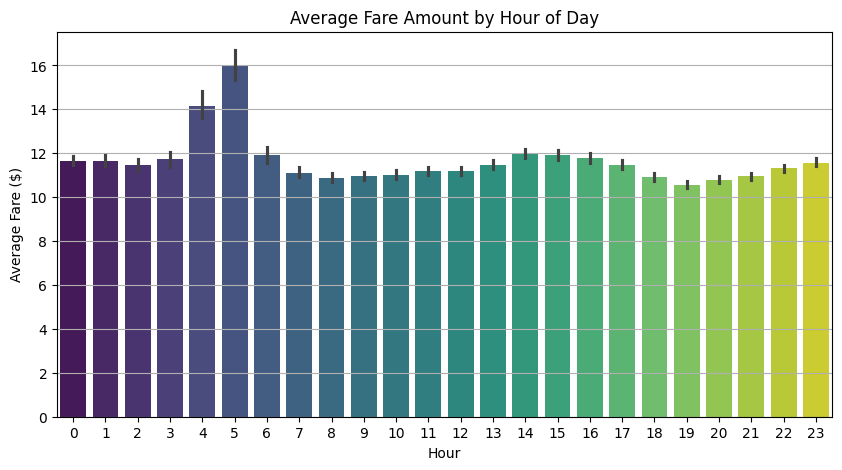

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df , x='hour', y='fare_amount', estimator='mean', palette='viridis')
plt.title('Average Fare Amount by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Fare ($)')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


/tmp/ipython-input-55-3023155294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='weekday', y='fare_amount', estimator='mean', order=ordered_days, palette='Set2')


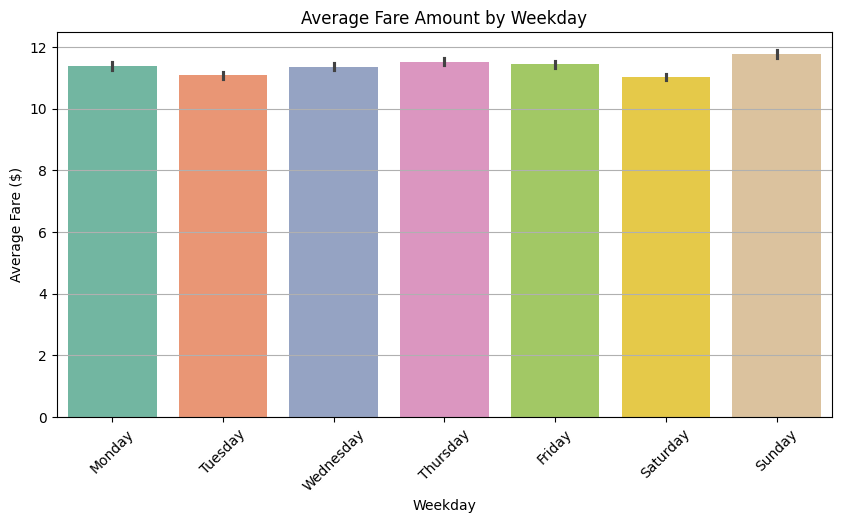

In [ ]:
# Order days of week manually
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.barplot(data=df , x='weekday', y='fare_amount', estimator='mean', order=ordered_days, palette='Set2')
plt.title('Average Fare Amount by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


/tmp/ipython-input-56-1944139112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='hour', palette='coolwarm')


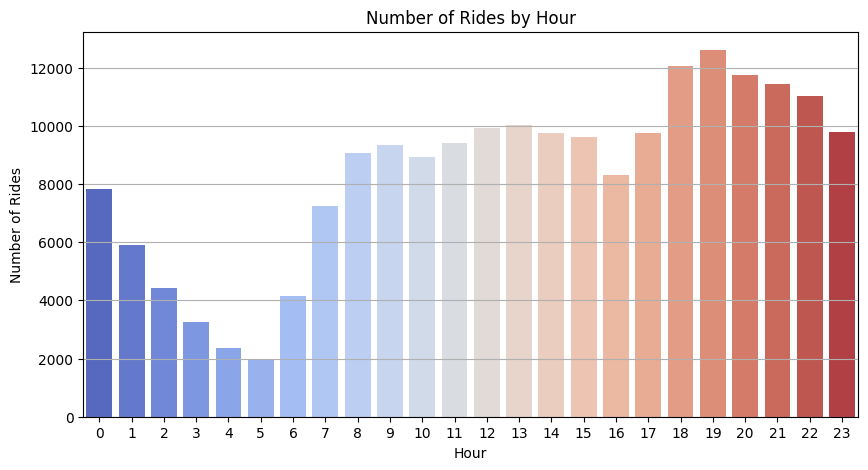

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df , x='hour', palette='coolwarm')
plt.title('Number of Rides by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


/tmp/ipython-input-57-3792482965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='month', y='fare_amount', palette='YlGnBu')


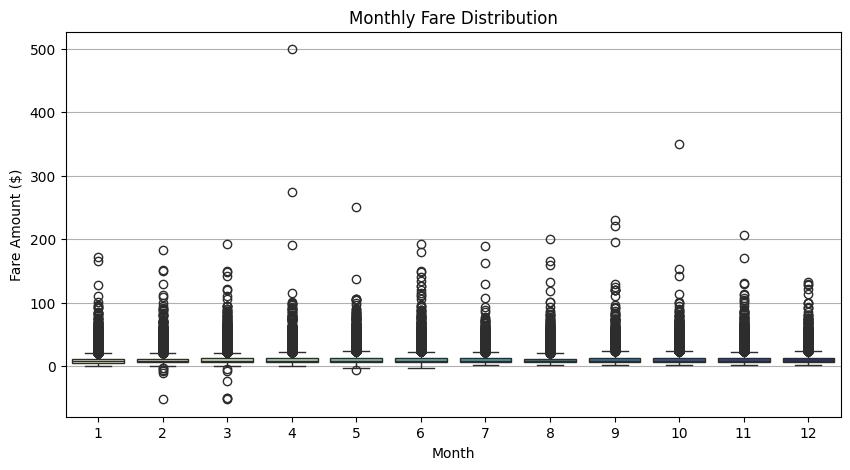

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df , x='month', y='fare_amount', palette='YlGnBu')
plt.title('Monthly Fare Distribution')
plt.xlabel('Month')
plt.ylabel('Fare Amount ($)')
plt.grid(axis='y')
plt.show()


In [44]:



# Save the enhanced dataset for Power BI import
df.to_csv('./uber_enhanced.csv', index=False)
print("\n✅ Enhanced dataset with new features exported to './data/uber_enhanced.csv'")


✅ Enhanced dataset with new features exported to './data/uber_enhanced.csv'
